## **Library one: matplotlib**

Using matplotlib to show the relationship of injuries to the types of activities.

In [1]:
import pandas as pd

shark_data = pd.read_csv("Shark_Incidents.csv") # read in the csv file that contains the shark incident data

shark_data.drop(['Comment', 'Confirmed Source', 'WFL Case #', 'County', 'Location'], axis=1, inplace=True) # dropping unnecessary columns
shark_data.drop(shark_data.index[211:], inplace=True) # drops rows that contained notes from the data collector(s)

shark_data.to_csv('modded_shark_incidents.csv', index=False) # after removing columns/rows that aren't needed
                                                                # saved that data to a new csv file

In [2]:
useful_shark = pd.read_csv('modded_shark_incidents.csv') # read in the new and useful csv
useful_shark.head()

,IncidentNum,Date,Time,Mode,Injury,Depth,Species,Longitude,Latitude
0,1,10/08/1950,12:00,Swimming,major,surface,White,-117.1466667,32.588333
1,2,05/27/1952,14:00,Swimming,minor,surface,White,-117.2466667,32.588333
2,3,12/07/1952,14:00,Swimming,fatal,surface,White,-122.05,36.626667
3,4,02/06/1955,12:00,Freediving,minor,surface,White,-122.15,36.626667
4,5,08/14/1956,16:30,Swimming,major,surface,White,-120.6466667,35.138333


In [3]:
mode = []
for i in useful_shark["Mode"]:
    mode.append(i)

injury_activities = ['Swimming', 'Free Diving', 'Scuba Diving', 'Hookah Diving', 'Surfing/Boarding', \
                     'Paddleboarding', 'Kayaking/Canoeing', 'Walking'] #x-axis
injury_activities_counts = [] #y-axis

swimming_count = mode.count("Swimming")
injury_activities_counts.append(swimming_count)

freediving_count = mode.count("Freediving")
injury_activities_counts.append(freediving_count)

scuba_diving_count = mode.count("Scuba Diving")
injury_activities_counts.append(scuba_diving_count)

hookah_diving_count = mode.count("Hookah Diving")
injury_activities_counts.append(hookah_diving_count)

surfing_boarding_count = mode.count("Surfing / Boarding")
injury_activities_counts.append(surfing_boarding_count)

paddleboarding_count = mode.count("Paddleboarding")
injury_activities_counts.append(paddleboarding_count)

kayaking_canoeing_count = mode.count("Kayaking / Canoeing")
injury_activities_counts.append(kayaking_canoeing_count)

walking_count = mode.count("Walking in shallow")
injury_activities_counts.append(walking_count)

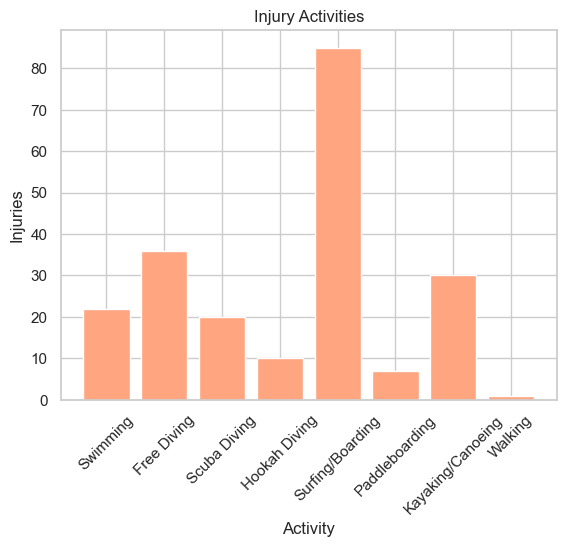

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

plt.bar(injury_activities, injury_activities_counts, color = (1.0, 0.647, 0.5))
plt.title("Injury Activities")
plt.xlabel("Activity")
plt.xticks(rotation = 45)
plt.ylabel("Injuries")
plt.show()

## **Library 2 - pandas**

Using pandas to calculate mean, min, and max values.

In [5]:
import pandas as pd

df_sharks = pd.read_csv('modded_shark_incidents.csv')
df_sharks['Depth'] = pd.to_numeric(df_sharks['Depth'], errors='coerce') #converts to numeric, if not numeric
                                                                        #converts to NaN
df_sharks = df_sharks[df_sharks['Depth'].notna()] #uses all values not NaN

mean_depth = df_sharks['Depth'].mean().round(2)
min_depth = df_sharks['Depth'].min()
max_depth = df_sharks['Depth'].max()

print("The mean depth of shark attacks is", mean_depth, "feet")
print("the minimum depth of a shark attack was", min_depth, "feet")
print("the maximum depth of a shark attack was", max_depth, "feet")

The mean depth of shark attacks is 25.23 feet
the minimum depth of a shark attack was 5.0 feet
the maximum depth of a shark attack was 72.0 feet


## **Library 3: folium**

Using folium to create an interactive map of shark attack locations

In [6]:
!pip install folium

In [7]:
import folium
import os
import pandas as pd
import bs4
import requests
import json

In [8]:
shark_coords = useful_shark.copy()
shark_coords['Latitude'] = pd.to_numeric(shark_coords['Latitude'], errors='coerce')
shark_coords = shark_coords[shark_coords['Latitude'].notna()]
shark_coords['Longitude'] = pd.to_numeric(shark_coords['Longitude'], errors='coerce')
shark_coords = shark_coords[shark_coords['Longitude'].notna()]

In [9]:
shark_incidents = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

for _, row in shark_coords.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=1.5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=1
    ).add_to(shark_incidents)

shark_incidents.save('shark_incident.html')

## **Library 4: altair**

Using altair to show how often attacks happen at certain times compared to the mean number of attacks.

[link](https://altair-viz.github.io/gallery/bar_chart_with_mean_line.html) to altair github page

In [175]:
import altair as alt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

shark_data = useful_shark.copy()

filtered_data = shark_data[~shark_data['Time'].isin(['Unknown', 'afternoon', 'early am'])] #filters out the three 
                                                                                            #unnecessary items
attack_counts = filtered_data.groupby('Time').size().reset_index(name='Number of Attacks')

bar = alt.Chart(attack_counts).mark_bar(color='rgb(255,165,128)').encode(
    x='Time:O', #O is ordinal
    y='Number of Attacks:Q' #Q is quantitative
)

rule = alt.Chart(attack_counts).mark_rule(color='black').encode(
    y='mean(Number of Attacks):Q'
)

(bar + rule).properties(width=900) #displays bar graph and mean amount of attacks with a width of 900

alt.LayerChart(...)